In [1]:
# PCAは手法の性質上、有用性は限られる
# 多様体学習アルゴリズム(manifold learning algorithms) と呼ばれる一連のアルゴリズムがある
# これらのアルゴリズムは、はるかに複雑なマッピングを行い、よりよい可視化を実現できる。特に有用なのがt-SNEである。
# 多様体学習のアルゴリズムの一部は、訓練データの新たな表現を計算するが、新しいデータを変換することはできない。つまり、テストセットにこれらのアルゴリズムを適用することはできない。
#多様体学習は、探索的なデータ解析には有用だが、最終的な目的が教師あり学習の場合にはほとんど用いられない。

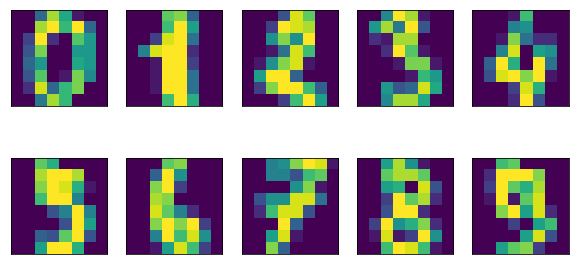

In [3]:
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt

digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

plt.show()

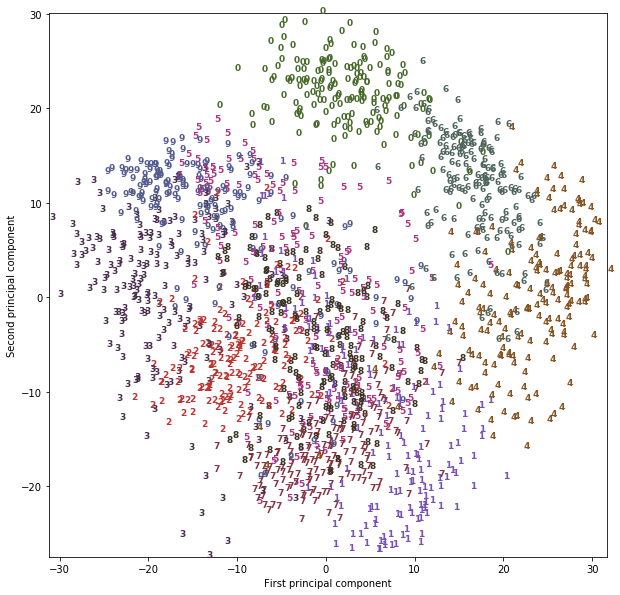

In [6]:
# PCAを使って2次元で可視化してみる
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(digits.data)
# 数値データを最初の2主成分で変形
digits_pca = pca.transform(digits.data)
colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525', '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size':9})

# PCAでは重なる部分が多い
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

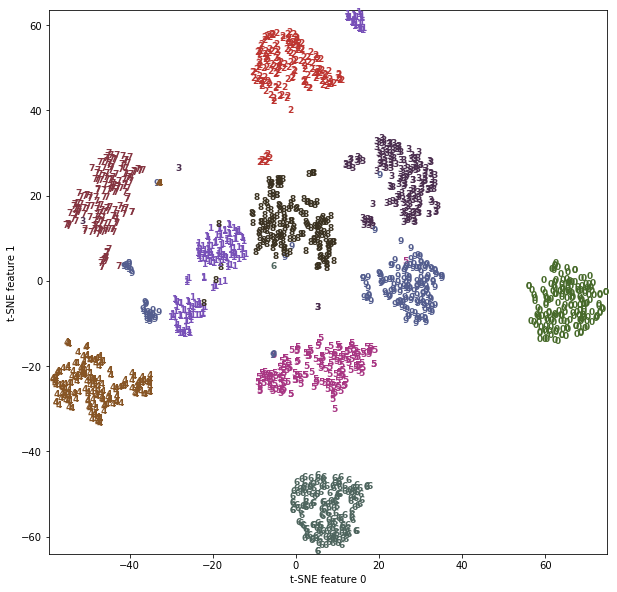

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# fitではなく、fit_transformを用いる。TSNEにはtransformメソッドがない
digits_tsne = tsne.fit_transform(digits.data)

# t-SNEはチューニングパラメータがいくつかあるが、デフォルトのままで大半はうまく機能する
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color=colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})
plt.xlabel('t-SNE feature 0')
plt.ylabel('t-SNE feature 1')
plt.show()